# EDA와 시각화

### EDA의 의미
EDA의 주제
* 저항성의 강조 : 이상치 등 부분적 변동에 대한 민감성 확인
* 잔차 계산 : 관찰 값들이 주 경향에서 벗어난 정도 파악
* 자료변수의 재표현 : 변수를 적당한 척도로 바꾸는 것
* 그래프를 통한 현시성 : 분석 결과를 이해하기 쉽게 시각화하는 것

### 막대그래프와 히스토그램

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

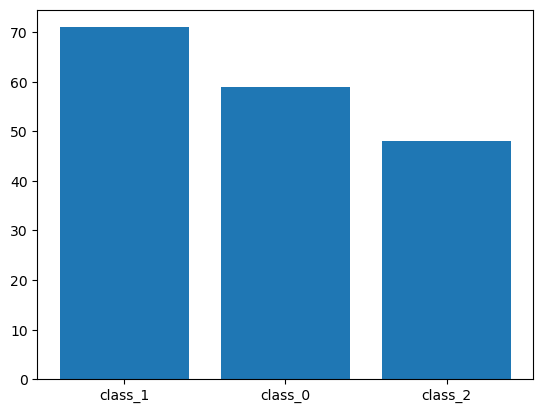

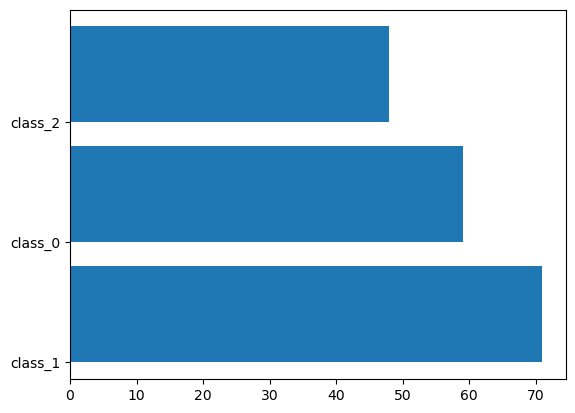

In [18]:
# 막대그래프
# plt.bar(x, height, width=0.8, bottom=None, align='center', data=None)
    # x : 막대의 x 좌표
    # height : 막대의 높이
    # width : 막대의 너비
    # bottom : 막대 바닥면의 y좌표(누적 막대그래프를 그릴 때 사용)
    # align : x 좌표에 대한 막대 정렬 {'center', 'edge'}

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns= wine_load.feature_names)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
print(wine)
print('\n=====\n')

# 도수분포표
wine_type = wine['class'].value_counts()
print(wine_type)
print('\n=====\n')

# 막대그래프 그리기
plt.bar(wine_type.index, wine_type.values, width=0.8, bottom=None, align='center')
plt.show()

plt.barh(wine_type.index, wine_type.values, height=0.8, left=None, align='edge')
plt.show()

#### 막대그래프 정리
* barplot에서는 각 범주의 값의 개수 차이를 비교하고, 차이가 극단적인지 확인한다.
* 예를 들어, 두 개의 범주를 비교할 때 각 범주의 개수 차이가 극단적일 경우 데이터 전처리 과정에서 업/다운 샘플링 등을 통해 각 범주의 개수가 유사하도록 조정해야 한다는 인사이트를 얻을 수 있다.

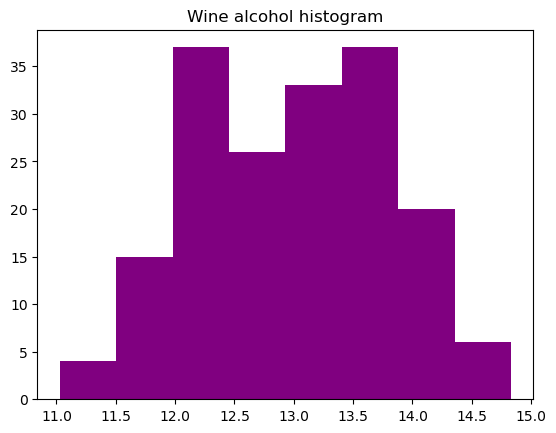

In [12]:
# 히스토그램
# plt.hist('변수명', bins=None, range=None, density=False, data=df)
    # bins : 히스토그램의 구간의 개수 정의
    # range : bin의 상한값과 하한값 (x.min(), x.max()) 형태로 선언
    # density : True이면 확률밀도함수를 그려 반환

plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins=8, range=(wine['alcohol'].min(), wine['alcohol'].max()), color='purple', data=wine)
plt.show()

---

### 상자 그림(Box Plot)

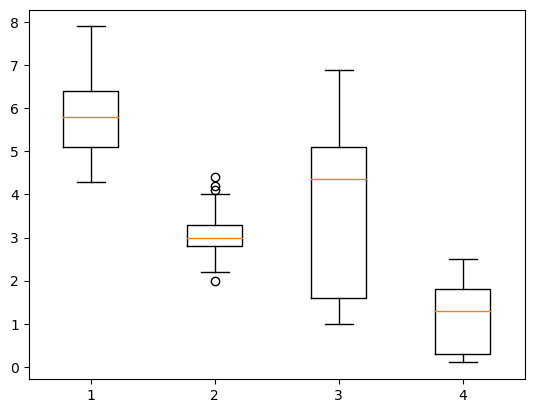


=====



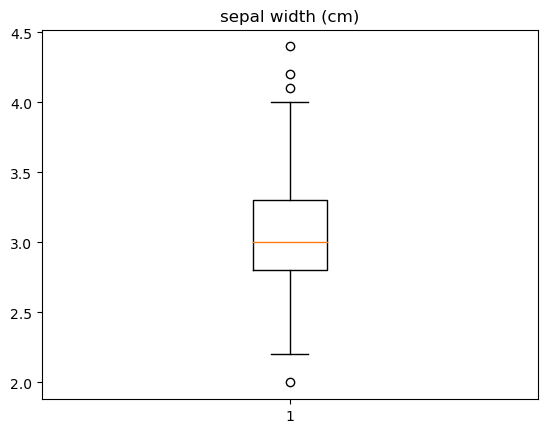


=====



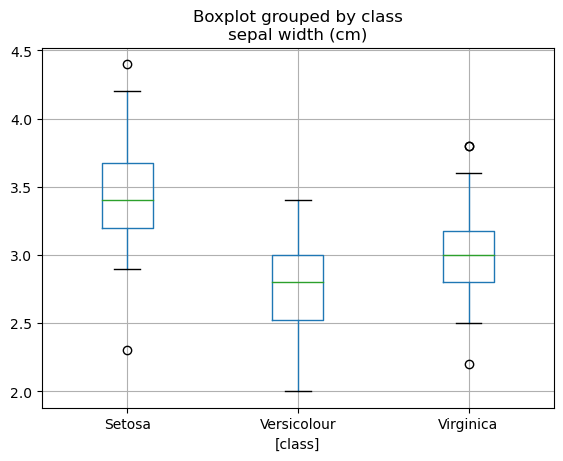


=====



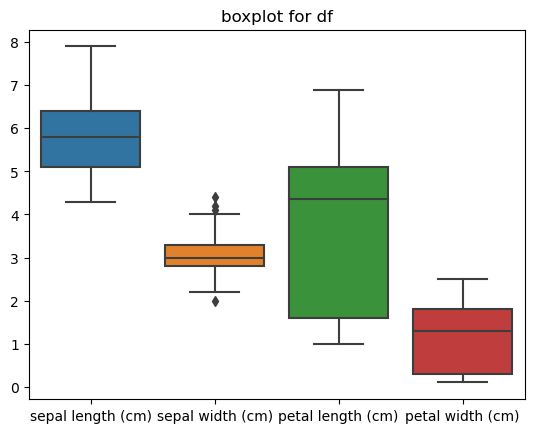


=====



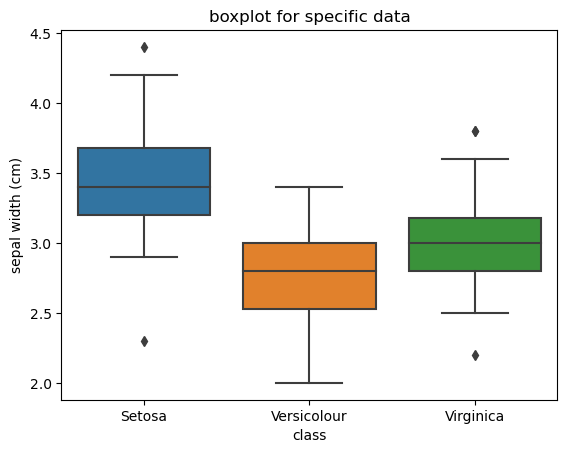

In [24]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# boxplot 그리기
plt.boxplot(iris.drop(columns='class')) # 수치형 변수만 그릴 수 있으므로 문자열 변수인 class는 drop한다.
plt.show()
print('\n=====\n')
# 하나의 변수에 대해서만 boxplot 그리기
plt.boxplot(iris['sepal width (cm)']) # whis(수염의 길이)는 입력 안하면 1.5가 default이다.
plt.title('sepal width (cm)')
plt.show()
print('\n=====\n')
# 한 컬럼을 카테고리 변수에 따라 분리하여 boxplot으로 표현하기
iris[['sepal width (cm)', 'class']].boxplot(by='class')
plt.show()
print('\n=====\n')
# seaborn 라이브러리 활용하여 더 예쁘게 그리기
import seaborn as sns
sns.boxplot(iris.drop(columns='class'))
plt.title('boxplot for df')
plt.show()
print('\n=====\n')
sns.boxplot(x='class', y='sepal width (cm)', data=iris)
plt.title('boxplot for specific data')
plt.show()

---

### 산점도(Scatter Plot)

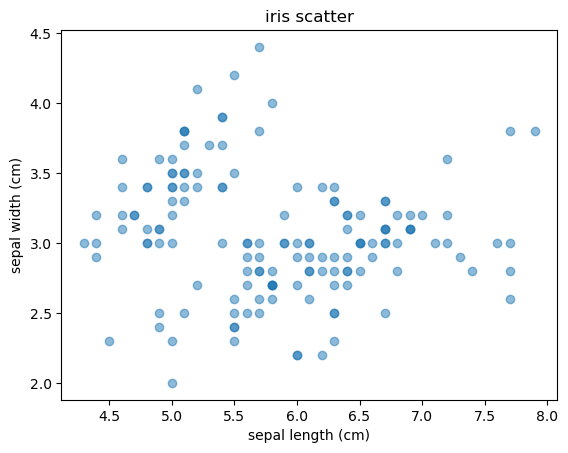

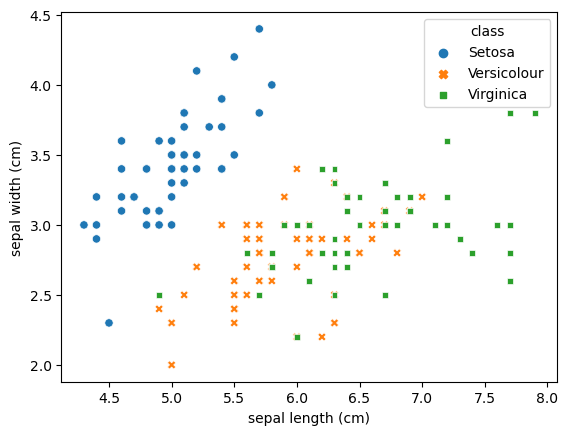

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 산점도 그리기
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], alpha=0.5) # alpha는 마커의 투명도(0~1)를 나타낸다. default는 0.5
plt.show()

# seaborn 라이브러리를 이용하여 한 컬럼을 카테고리 변수에 따라 색을 분리하여 표현할 수도 있다.
import seaborn as sns
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='class', style='class')
    # hue는 ~에 따라 색상을 다르게 해라
    # style은 ~에 따라 점의 스타일을 다르게 해라
    # hue 또는 style을 설정하면 범례는 자동으로 나온다.
plt.show()

---

### 선 그래프

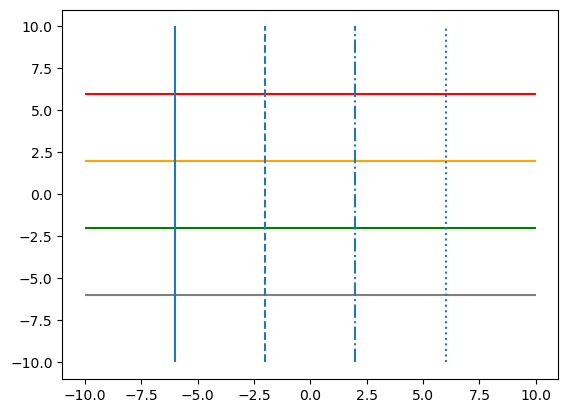

In [38]:
# 수평선(hlines), 수직선(vlines) 그래프
# plt.hlines(y, xmin, xmax, colors=None, linestyle='solid')
# plt.vlines(x, ymin, ymax, colors=None, linestyle='solid')

import matplotlib.pyplot as plt
plt.hlines(-6, -10, 10, color='gray')
plt.hlines(-2, -10, 10, color='green')
plt.hlines(2, -10, 10, color='orange')
plt.hlines(6, -10, 10, color='red')
plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')

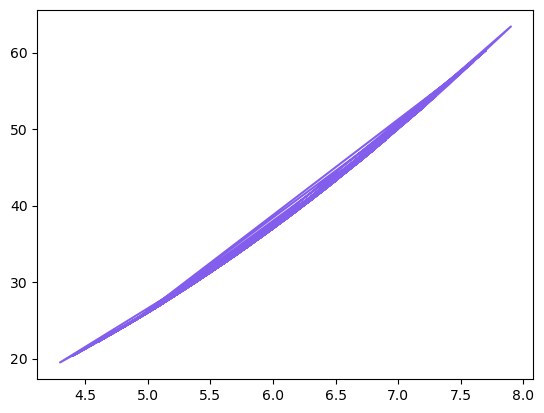

In [48]:
# 함수식 그래프
# plt.plot(x축, 함수식, data=df, c='color')

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 그래프 설정
def linear_func(x):
    return x**2+1
X=iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='#835eed')
plt.show()

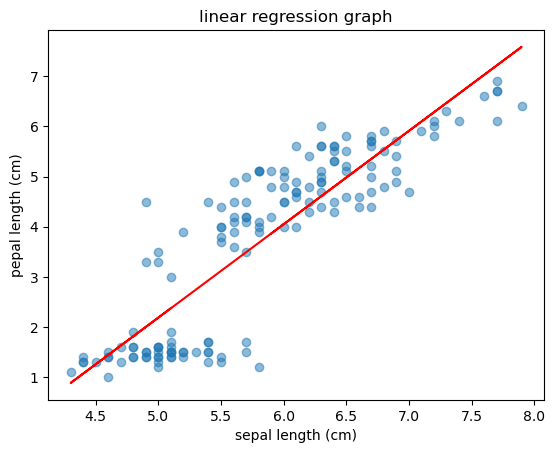

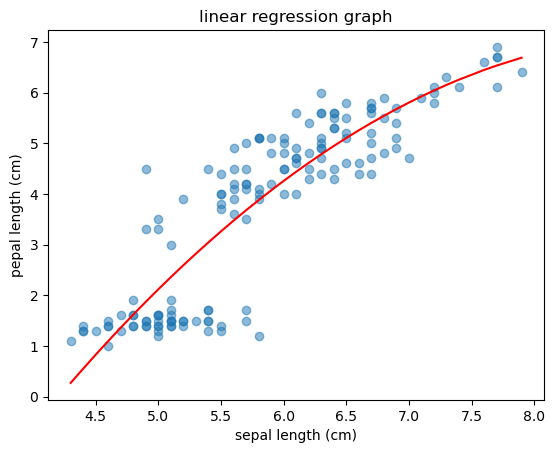

In [54]:
# 다항회귀선 그래프(ployfit)
# np.polyfit(x, y, 차수)
X, Y=iris['sepal length (cm)'], iris['petal length (cm)']

# 일차회귀
import numpy as np
b1, b0=np.polyfit(X, Y, 1)
plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b1*X+b0, color='red')
plt.title('linear regression graph')
plt.xlabel('sepal length (cm)')
plt.ylabel('pepal length (cm)')
plt.show()

# 이차회귀
    # 일차회귀와 비슷하지만, 이차 이상의 그래프를 그리는 경우 데이터를 X값에 대하여 정렬할 필요가 있다.
iris2= iris.sort_values(by='sepal length (cm)')
X, Y=iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0=np.polyfit(X, Y, 2)
plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b2*X**2+b1*X+b0, color='red')
plt.title('quadratic regression graph')
plt.xlabel('sepal length (cm)')
plt.ylabel('pepal length (cm)')
plt.show()

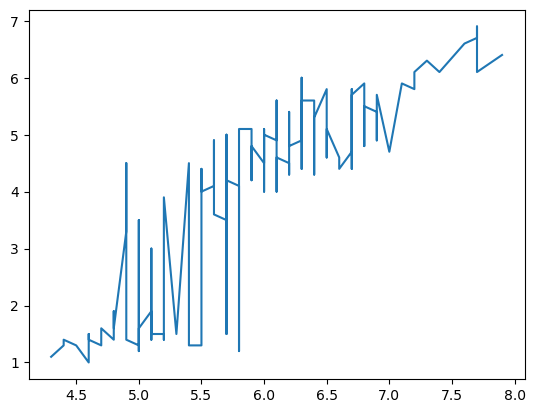

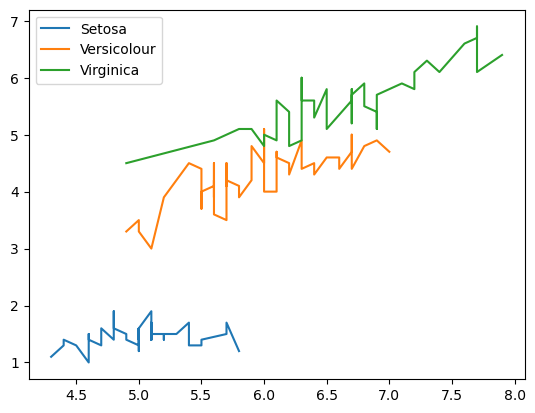

In [61]:
# 꺾은선 그래프
# 시간의 변화에 따라 값이 지속적으로 변홯랄 때 유용한 그래프
# 주로 x축이 시점, y축이 값을 의미
# 즉, 시점에 대한 변화를 보여주는 그래프이므로 x축 값에 대한 정렬이 필요하다.

iris3=iris.sort_values(by='sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris3)
plt.show()

# 꺾은선 그래프토 카테고리에 따라 분리된 그래프로 그릴 수 있다.
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris3.loc[iris3['class']=='Setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris3.loc[iris3['class']=='Versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris3.loc[iris3['class']=='Virginica'])
plt.legend(iris3['class'].unique()) # 범례 표시
plt.show()

---

### 상관관계 시각화

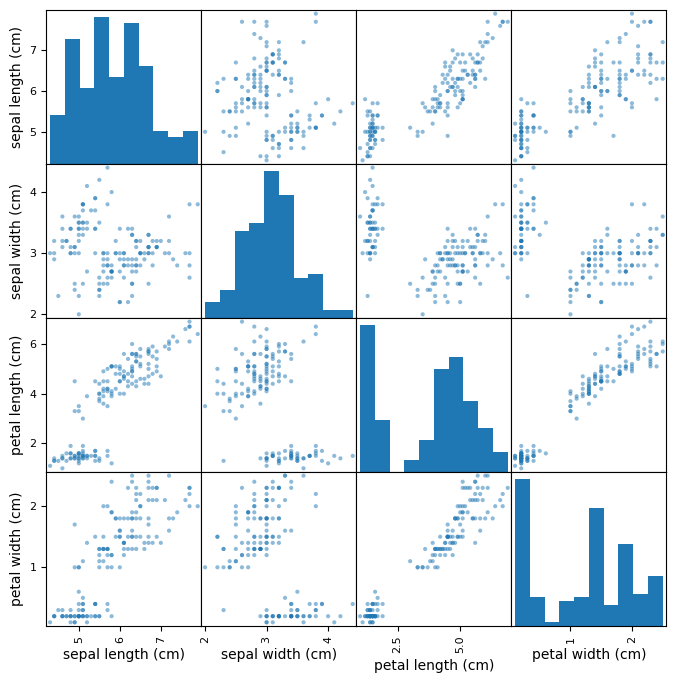


=====



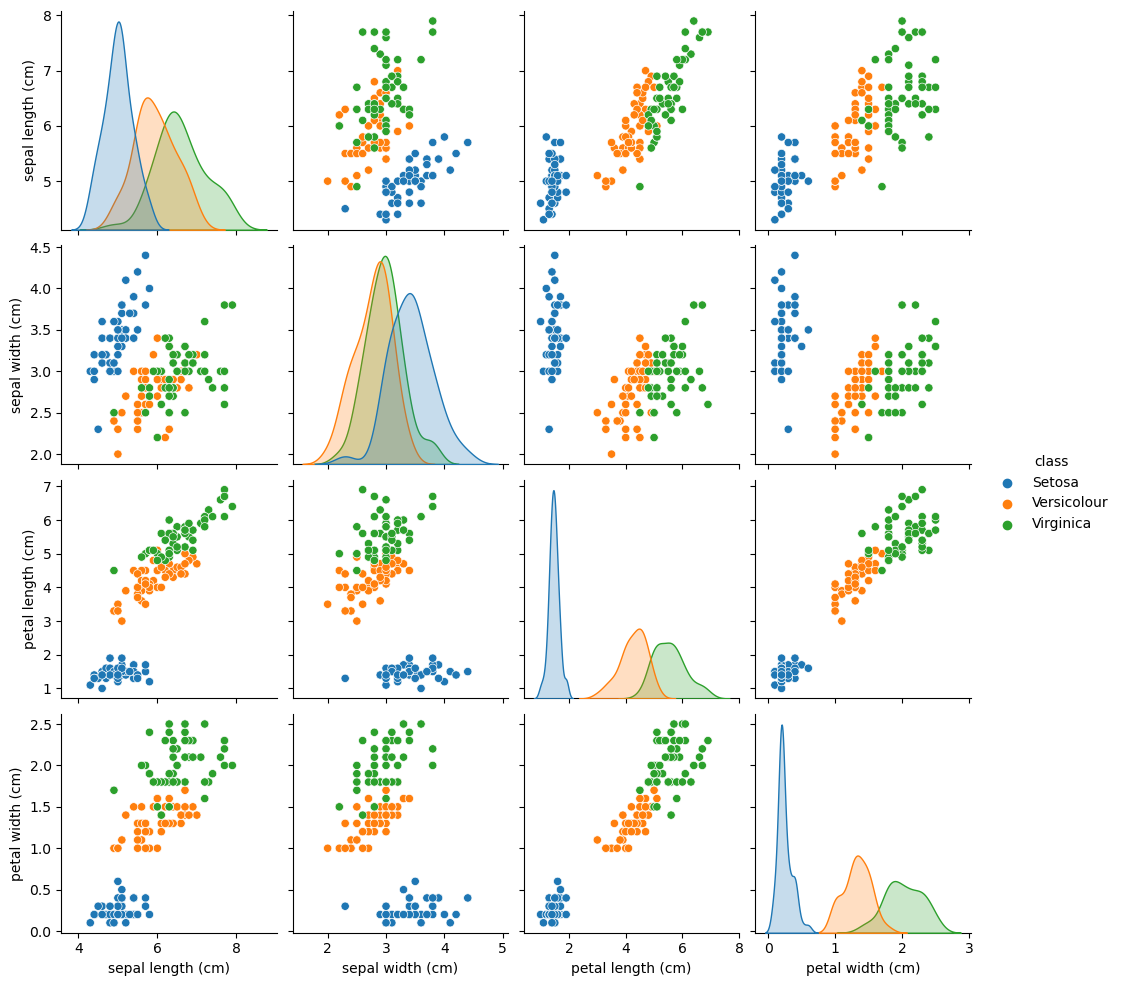

In [66]:
# 산점도 행렬
# scatter_matrix(data, alpha=0.5, figsize=(8, 8), diagonal='hist')
    # data : DataFrame
    # alpha : 투명도
    # figsize : 그래프 크기(x, y)
    # diagonal : 대각선의 밀도 그래프 종류(hist/kde)

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

scatter_matrix(iris, alpha=0.5, figsize=(8, 8), diagonal='hist')
plt.show()
print('\n=====\n')

# target 별 값의 차이가 나는 데이터에 대해서는 seaborn 라이브러리를 사용하여 target 범주별 색깔을 다르게 지정할 수도 있다.
# sns.pairplot(data, diag_kind='auto', hue='targer 컬럼명')
    # data : DataFrame
    # diag_kind : 대각선 밀도 그래프 종류(auto, hist, kde)
    # hue : 색을 구분할 타깃 변수

import seaborn as sns
sns.pairplot(iris, diag_kind='kde', hue='class')
plt.show()

#### 산점도 행렬 해석 방법
1. 대각선의 히스토그램을 통해 이상치를 확인한다.
2. 종속변수와 설명변수들 간의 관계를 시각적으로 판단한다.
3. 종속변수가 수치형인 경우 각 설명변수와의 직선 상관관계를 비교한다.
4. 종속변수가 범주형인 경우 종속변수를 잘 구분하는 변수를 파악한다.
5. 설명변수 간의 직선 함수관계를 파악하여 다중공선성 문제를 진단한다.

#### kde(Kernel Density Estimator)그래프
커널 밀도 추정 그래프로, 히스토그램과 함께 Non-parametric 밀도 추정 방법 중 하나이다.
bin의 크기와 시작 및 종료 위치에 따라서 그래프가 달라지는 히스토그램의 문제점을 개선한 방법으로, 커널 함수를 사용하여 데이터의 분포를 smooth하게 나타낸 것이다.

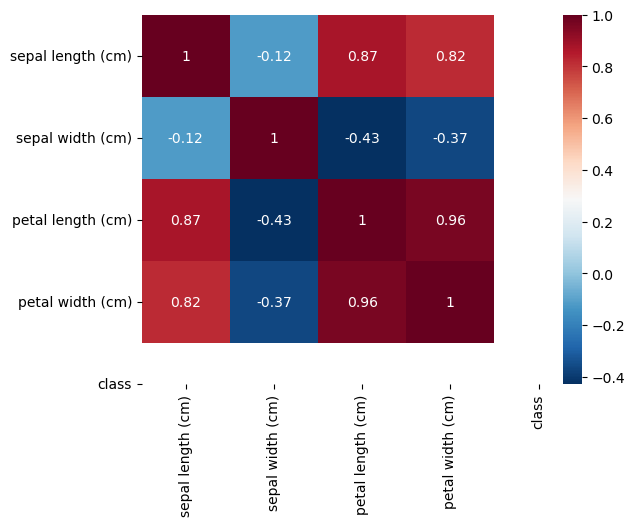

In [72]:
# 상관계수 행렬 그래프
# 상관계수 구하기
    # data=data.corr(method='pearson')
        # method : 상관분석 방법 {'pearson'(default), 'kendall', 'spearman'}

# 이후 seaborn 라이브러리의 heatmap()을 이용하여 상관계수 행렬을 그린다.
    # sns.heatmap(data, xticklabels=data.columns, yticklabels=datacolumns, cmap='RdBu_r', annot=True)
        # data : 상관행렬을 그릴 데이터의 상관계수 데이터프레임
        # xticklabels : x축의 라벨명
        # yticklabels : y축의 라벨명
        # cmap : 히트맵의 색깔 지정
        # annot : Truedㅣㄹ 경우 상관계수를 텍스트로 표시

import seaborn as sns

iris_corr = iris.drop(columns='class').corr(method='pearson')
sns.heatmap(iris_corr, xticklabels=iris.columns, yticklabels=iris.columns, cmap='RdBu_r', annot=True)
plt.show()

#### 상관관계 해석하기
* -0.8, -0.6, -0.4, 0, 0.4, 0.6, 0.8을 기준으로 강한 상관관계, 보통 상관관계, 약한 상관관계, 거의 상관 없음과 같이 구분한다.

### Pandas Profiling

In [76]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached scipy-1.9.3-cp310-cp310-macosx_10_9_x86_64.whl (34.3 MB)
  Using cached matplotlib-3.6.3-cp310-cp310-macosx_10_12_x86_64.whl (7.3 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached numpy-1.23.5-cp310-cp310-macosx_10_9_x86_64.whl (18.1 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached statsmodels-0.13.5-cp310-cp310-macosx_10_9_x86_64.whl (9.7 MB)
  Using cached pydantic-1.10.7-cp310-cp310-macosx_10_9_x86_64.whl (2.9 MB)
  Using cached phik-0.12.3-cp310-cp310-macosx_10_13_x86_64.whl (652 kB)
  Using cached PyWavelets-1.4.1-cp310-cp310-macosx_10_13_x86_64.whl (4.4 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [77]:
# pandas profiling은 EDA를 한 줄로 수행함으로써 시험장에서 시간을 획기적으로 줄일 수 있다.
# 시험장에서 사용되는 버전을 확인하고 그에 맞는 코드를 준비해 가는 것이 좋다.

import pandas as pd
from sklearn.datasets import load_iris
from pandas_profiling import ProfileReport

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 판다스 프로파일링
ProfileReport(iris)

/var/folders/fw/2dys5ylj2x7d0x79mh5jkmy80000gn/T/ipykernel_1388/2232941419.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]